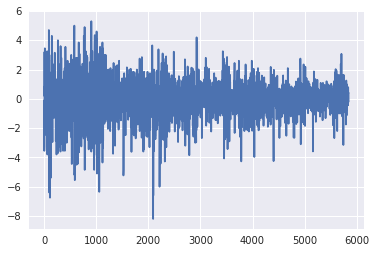

In [31]:
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
%matplotlib inline

sb.set()

df = pd.read_csv("P2training.csv")
df["Date"] = pd.to_datetime(df["Date"])

diff = pd.DataFrame()
diff["Date"] =  (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
diff["JPY"]  = df["JPY/USD"] - df["JPY/USD"].shift(1)


plt.plot(diff["Date"],diff["JPY"])

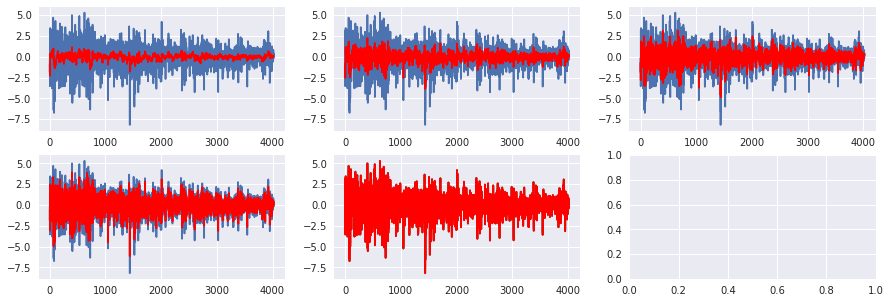

In [34]:
fig, ax = plt.subplots(2,3,figsize=(15,5))
al = 0.1;
ewmaPoint1 = diff['JPY'].ewm(alpha=al, min_periods=0, freq=None)
ax[0,0].plot(range(0,df.shape[0]), diff['JPY'])
ax[0,0].plot(range(0,df.shape[0]), ewmaPoint1.mean(), color='red')

al = 0.3;
ewmaPoint3 = diff['JPY'].ewm(alpha=al, min_periods=0, freq=None)
ax[0,1].plot(range(0,df.shape[0]), diff['JPY'])
ax[0,1].plot(range(0,df.shape[0]), ewmaPoint3.mean(), color='red')

al = 0.5;
ewmaPoint5 = diff['JPY'].ewm(alpha=al, min_periods=0, freq=None)
ax[0,2].plot(range(0,df.shape[0]), diff['JPY'])
ax[0,2].plot(range(0,df.shape[0]), ewmaPoint5.mean(), color='red')

al = 0.7;
ewmaPoint7 = diff['JPY'].ewm(alpha=al, min_periods=0, freq=None)
ax[1,0].plot(range(0,df.shape[0]), diff['JPY'])
ax[1,0].plot(range(0,df.shape[0]), ewmaPoint7.mean(), color='red')

al = .9;
ewmaPoint9 = diff['JPY'].ewm(alpha=al, min_periods=0, freq=None)
ax[1,1].plot(range(0,df.shape[0]), diff['JPY'])
ax[1,1].plot(range(0,df.shape[0]), ewmaPoint9.mean(), color='red')

al = .9999;
ewmaPoint9999 = diff['JPY'].ewm(alpha=al, min_periods=0, freq=None)
ax[1,1].plot(range(0,df.shape[0]), diff['JPY'])
ax[1,1].plot(range(0,df.shape[0]), ewmaPoint9999.mean(), color='red')

0.01


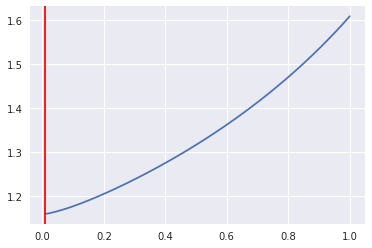

In [35]:
alpha = np.linspace(0.01,1,num=100)
err = [];
# given a series and alpha, return series of smoothed points
for al in alpha:
    ewma = diff['JPY'].ewm(alpha=al, min_periods=0, freq=None)
    pred = ewma.mean();
    #Computing square error:
    diffe = diff['JPY'] - pred.shift(1);
    err.append(np.sqrt((diffe ** 2).mean()))
    
plt.plot(alpha, err)
optal = alpha[np.argmin(err)]
plt.axvline(x=optal, color='red')
print(optal)